In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt

<p style="font-size: 30px; line-height: 135%;}">
<b>Calidad de un vino</b>
</p>

<p style="font-size: 25px; line-height: 135%;}">
<b>Pregunta a</b>
</p>

In [2]:
import pandas as pd
df_red = pd.read_csv("winequality-red.csv",sep=";")
df_white = pd.read_csv("winequality-white.csv",sep=";")
df = pd.concat([df_red,df_white], axis=0)

df = df.assign(Tinto = pd.Series(np.array([1] * len(df_red) + [0] * len(df_white))).values)

display(df.describe())
df.info()
display(df.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Tinto
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
Tinto                   6497 non-null int32
dtypes: float64(11), int32(1), int64(1)
memory usage: 685.2 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Tinto
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


<p style="font-size: 18px; line-height: 135%;}">
<b>a)</b> El dataset presenta un total de 6497 registros, estos con 13 atributos no nulos. Se pueden ver estadisticos relacionados a cada atributo en la tabla mostrada con el método ``df.describe()``. Quality es una variable categorica que establece la calidad del vino y tinto es una variable binaria que indica si efectivamente ese vino era tinto o no.
</p>

<p style="font-size: 25px; line-height: 135%;}">
<b>Pregunta b</b>
</p>

In [3]:
df['good_quality'] = [1 if q>5 else 0 for q in df.quality]
del df['quality']

In [4]:
from sklearn.model_selection import train_test_split

atributos = list(df)
atributos.remove("good_quality")

X = df.as_matrix(atributos)
y = df.as_matrix(["good_quality"])

#Se proceden a generar los conjuntos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

<p style="font-size: 18px; line-height: 135%;}">
<b>b)</b> Se crea el conjunto de entrenamiento, validación y test con la función ``train_test_split()``, el 25% del total del dataset corresponde al test, y desde el 75% restante el 25% de este es validación y el resto es entrenamiento.

</p>

<p style="font-size: 25px; line-height: 135%;}">
<b>Pregunta c</b>
</p>

In [5]:
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier as Tree

mejor = -1
#Se empieza a probar con profundidades del 1 al 100
for p in range(1, 101):
    model = Tree(random_state=0, max_depth=p)
    model.fit(X_train, y_train)
    y_pred_val = model.predict(X_val)
    score = f1_score(y_val, y_pred_val, average='binary')  
    
    #Se evalua cual es el mejor puntaje y se almacena este y su profundidad
    if score > mejor:
        mejor = score
        mejorProfundidad = p
        
model = Tree(random_state = 0, max_depth = mejorProfundidad)
model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)
score = f1_score(y_test, y_pred_test, average='binary')  
        
print("El mejor puntaje objtenido es: "+str(score)+" , con profundidad",mejorProfundidad)

El mejor puntaje objtenido es: 0.78533007335 , con profundidad 11


<p style="font-size: 18px; line-height: 135%;}">
<b>c)</b> Se realizó un árbol de decisión y se fue probando desde la profundidad 1 a la 100, finalmente se muestra que la métrica F1-score da aproximadamente 0.78 y con profundidad 11.
</p>

<p style="font-size: 25px; line-height: 135%;}">
<b>Pregunta d</b>
</p>

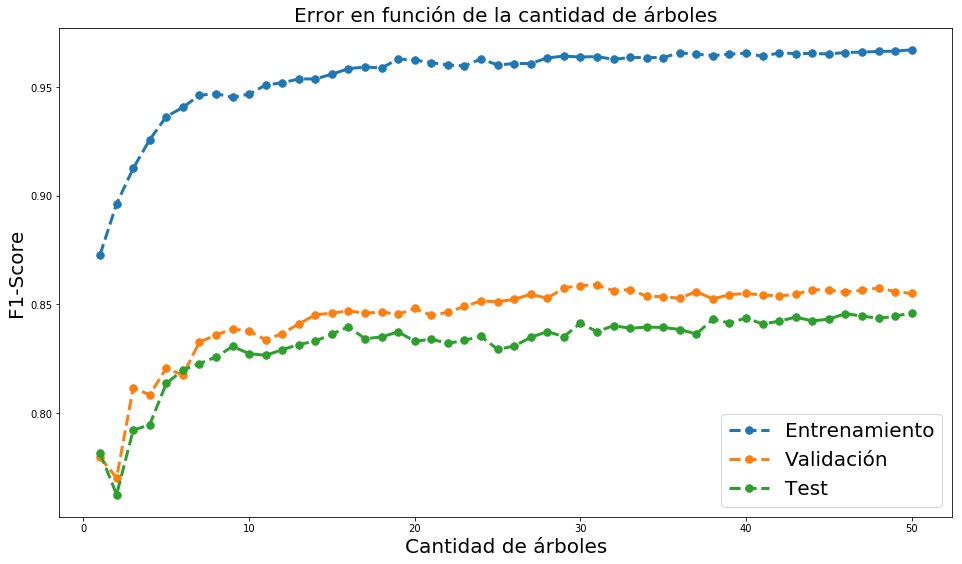

El mejor F1-Score es 0.837386742966


In [6]:
from sklearn.ensemble import RandomForestClassifier

eTest = list()
eTrain = list()
eVal = list()

maxArboles = 51

#Se procede a calcularlos errores en funcion de la cantidad de árboles
for i in range(1, maxArboles):
    model = RandomForestClassifier(random_state = 0, n_estimators = i, max_depth=mejorProfundidad, n_jobs=-1)
    
    #Se entrena el modelo, notar que se transforma la matriz columna y a un vector fila
    model.fit(X_train, y_train.reshape(y_train.shape[0]))
    
    #Se predice el entrenamiento y el test
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    y_pred_test = model.predict(X_test)
    
    #Se guardan los errores
    eTrain.append(f1_score(y_train, y_pred_train))
    eVal.append(f1_score(y_val, y_pred_val))
    eTest.append(f1_score(y_test, y_pred_test))
    
plt.figure(figsize = (16, 9))

grosor = 3
tamañopto = 15

plt.plot( [i for i in range(1, maxArboles)] , eTrain, ".--", linewidth = grosor, markersize = tamañopto)
plt.plot( [i for i in range(1, maxArboles)] , eVal, ".--", linewidth = grosor, markersize = tamañopto)
plt.plot( [i for i in range(1, maxArboles)], eTest, ".--", linewidth = grosor, markersize = tamañopto)
plt.legend(["Entrenamiento", "Validación" ,  "Test"], prop={'size': 20})
plt.title('Error en función de la cantidad de árboles', fontsize=20)
plt.xlabel("Cantidad de árboles", fontsize=20)
plt.ylabel("F1-Score", fontsize=20)

plt.show()

print("El mejor F1-Score es",eTest[eVal.index(max(eVal))] )

<p style="font-size: 25px; line-height: 135%;}">
<b>Pregunta e</b>
</p>

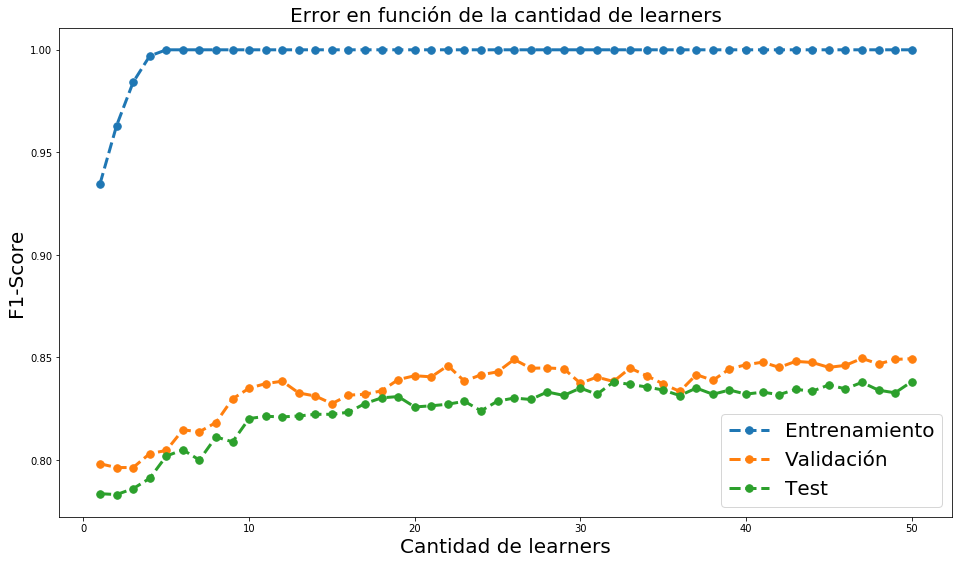

El mejor F1-Score es 0.83787661406


In [7]:
from sklearn.ensemble import AdaBoostClassifier

eTest = list()
eTrain = list()
eVal = list()

maxArboles = 51

#Se procede a calcularlos errores en funcion de la cantidad de árboles
for i in range(1, maxArboles):

    model = AdaBoostClassifier(base_estimator=Tree(max_depth=mejorProfundidad, random_state = 0), n_estimators= i, random_state = 0)
       
    #Se entrena el modelo, notar que se transforma la matriz columna y a un vector fila
    model.fit(X_train, y_train.reshape(y_train.shape[0]))
    
    #Se predice el entrenamiento y el test
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    y_pred_test = model.predict(X_test)
    
    #Se guardan los errores
    eTrain.append(f1_score(y_train, y_pred_train))
    eVal.append(f1_score(y_val, y_pred_val))
    eTest.append(f1_score(y_test, y_pred_test))
    
plt.figure(figsize = (16, 9))

grosor = 3
tamañopto = 15

plt.plot( [i for i in range(1, maxArboles)] , eTrain, ".--", linewidth = grosor, markersize = tamañopto)
plt.plot( [i for i in range(1, maxArboles)] , eVal, ".--", linewidth = grosor, markersize = tamañopto)
plt.plot( [i for i in range(1, maxArboles)], eTest, ".--", linewidth = grosor, markersize = tamañopto)
plt.legend(["Entrenamiento", "Validación" ,  "Test"], prop={'size': 20})
plt.title('Error en función de la cantidad de learners', fontsize=20)
plt.xlabel("Cantidad de learners", fontsize=20)
plt.ylabel("F1-Score", fontsize=20)

plt.show()

print("El mejor F1-Score es",eTest[eVal.index(max(eVal))] )

<p style="font-size: 18px; line-height: 135%;}">
<b>e)</b> Al comparar ambos ensamblado se aprecia que random forest posee un mejor desempeño según la metrica F1-Score. Al ver los gráficos se aprecian diferencias en el crecimiento del F1-Score de entrenamiento, en AdaBoost se alcanza el valor 1 con alrededor de 5 máquinas mientras que con random forest nunca se llega a este valor y a ambos ensamblados se les restringió la altura máxima de los árboles.
</p>

<p style="font-size: 25px; line-height: 135%;}">
<b>Pregunta f</b>
</p>

'Vinos a utilizar:'

1599

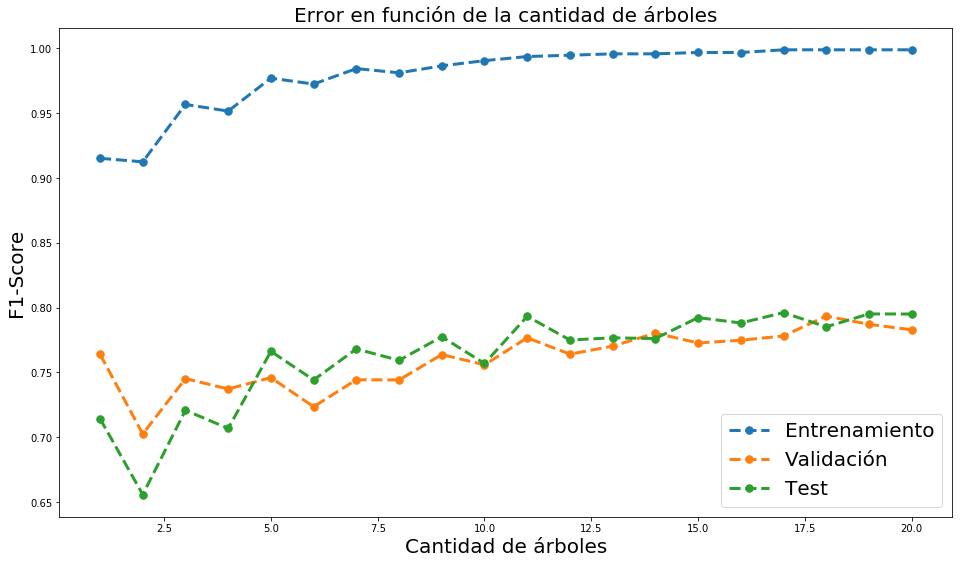

El mejor F1-Score es 0.785185185185


'Vinos a utilizar:'

4898

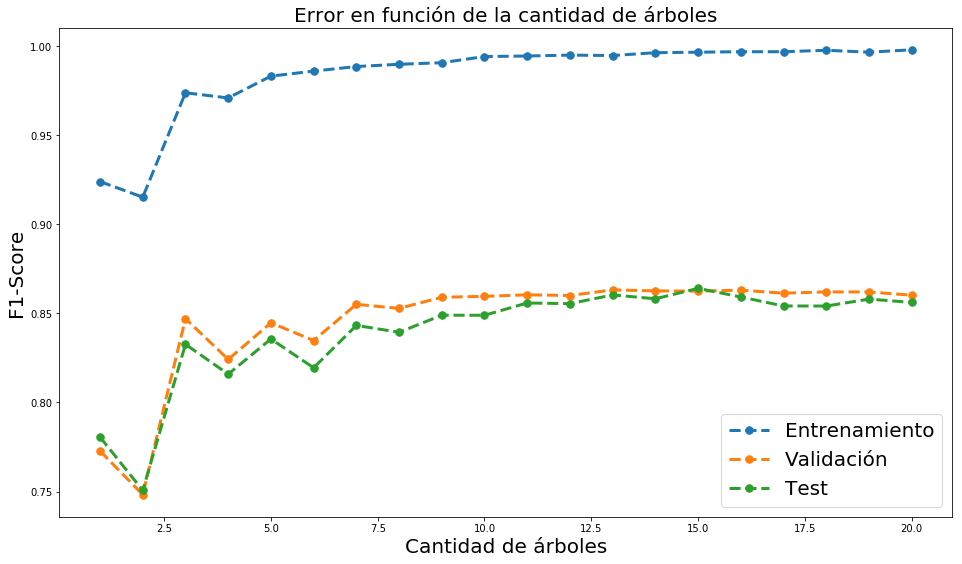

El mejor F1-Score es 0.860328638498


In [8]:
def f(flag): #1 para tinto, 0 para blanco
    df_tinto = df.loc[df['Tinto'] == flag]
    atributos = list(df_tinto)
    atributos.remove("good_quality")
    atributos.remove("Tinto")
    
    #display(df_tinto.info())

    X = df_tinto.as_matrix(atributos)
    y = df_tinto.as_matrix(["good_quality"])
    
    display("Vinos a utilizar:",X.shape[0])

    #Se proceden a generar los conjuntos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
    
    from sklearn.ensemble import RandomForestClassifier

    eTest = list()
    eTrain = list()
    eVal = list()

    maxArboles = 21

    #Se procede a calcularlos errores en funcion de la cantidad de árboles
    for i in range(1, maxArboles):
        model = RandomForestClassifier(random_state = 0, n_estimators = i, n_jobs=-1)

        #Se entrena el modelo, notar que se transforma la matriz columna y a un vector fila
        model.fit(X_train, y_train.reshape(y_train.shape[0]))

        #Se predice el entrenamiento y el test
        y_pred_train = model.predict(X_train)
        y_pred_val = model.predict(X_val)
        y_pred_test = model.predict(X_test)

        #Se guardan los errores
        eTrain.append(f1_score(y_train, y_pred_train))
        eVal.append(f1_score(y_val, y_pred_val))
        eTest.append(f1_score(y_test, y_pred_test))

    plt.figure(figsize = (16, 9))

    grosor = 3
    tamañopto = 15

    plt.plot( [i for i in range(1, maxArboles)] , eTrain, ".--", linewidth = grosor, markersize = tamañopto)
    plt.plot( [i for i in range(1, maxArboles)] , eVal, ".--", linewidth = grosor, markersize = tamañopto)
    plt.plot( [i for i in range(1, maxArboles)], eTest, ".--", linewidth = grosor, markersize = tamañopto)
    plt.legend(["Entrenamiento", "Validación" ,  "Test"], prop={'size': 20})
    plt.title('Error en función de la cantidad de árboles', fontsize=20)
    plt.xlabel("Cantidad de árboles", fontsize=20)
    plt.ylabel("F1-Score", fontsize=20)

    plt.show()

    print("El mejor F1-Score es",eTest[eVal.index(max(eVal))] )
    
f(1)
f(0)

In [9]:
from sklearn.svm import SVC as SVM
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(X_train)

X_train = std.transform(X_train)
X_val = std.transform(X_val)
X_test = std.transform(X_test)


mayor = -1
C_range = np.logspace(-3, 3, 7)
gamma_range = np.logspace(-3, 3, 7)
for i in C_range:
    for j in gamma_range:
        model = SVM(kernel = "rbf", C = i, gamma = j)
        model.fit(X_train,y_train.reshape(y_train.shape[0]))

        y_pred_val = model.predict(X_val)
        score = f1_score(y_val, y_pred_val)

        if score > mayor:
            mayor = score
            best_c = i
            best_gamma = j
    print("Iteración terminada.")
    
model = SVM(kernel = "rbf", C = best_c, gamma = best_gamma)
model.fit(X_train,y_train.reshape(y_train.shape[0]))
y_pred_test = model.predict(X_test)
score = f1_score(y_test, y_pred_test)
print("C:",best_c)
print("Gamma:",best_gamma)
print("F1-Score:", score)

Iteración terminada.
Iteración terminada.
Iteración terminada.
Iteración terminada.
Iteración terminada.
Iteración terminada.
Iteración terminada.
C: 1.0
Gamma: 1.0
F1-Score: 0.817604355717


<p style="font-size: 18px; line-height: 135%;}">
<b>f)</b> Al comparar el árbol de decisión, el random forest, el adaboost de árboles y la SVM se aprecía que la que produce mejores resultados es random forest. Adicionalmente si se separa el problema en 2 máquinas orientadas cada una a un tipo de vino se obtiene un mejor resultado para el caso del vino blanco llegando con un ensamblado random forest a un F1-Score de aproximadamente 0.86, pero para el vino tinto empeora.
</p>

<p style="font-size: 25px; line-height: 135%;}">
<b>Pregunta g</b>
</p>

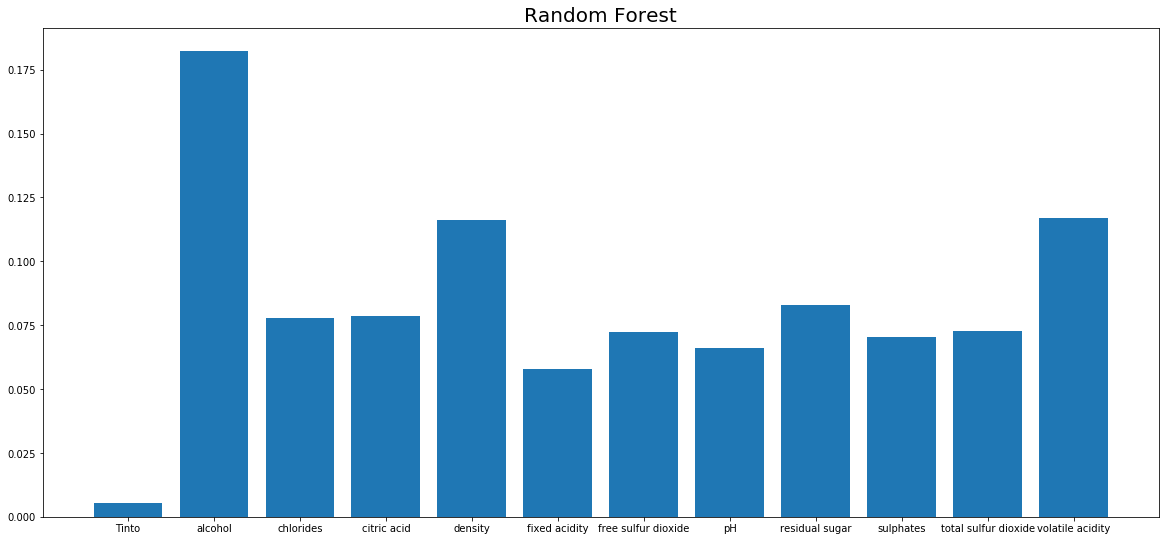

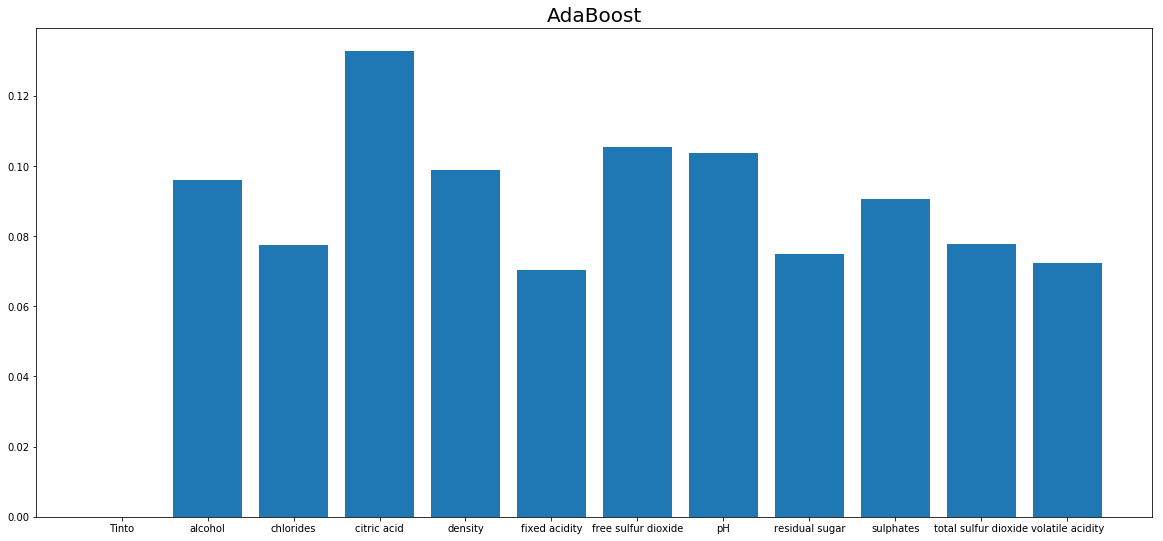

In [10]:
df_red = pd.read_csv("winequality-red.csv",sep=";")
df_white = pd.read_csv("winequality-white.csv",sep=";")
df = pd.concat([df_red,df_white], axis=0)
df = df.assign(Tinto = pd.Series(np.array([1] * len(df_red) + [0] * len(df_white))).values)

df['good_quality'] = [1 if q>5 else 0 for q in df.quality]
del df['quality']

atributos = list(df)
atributos.remove("good_quality")
X = df.as_matrix(atributos)
y = df.as_matrix(["good_quality"])

#Se proceden a generar los conjuntos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)


model = RandomForestClassifier(random_state = 0, n_estimators = 50, max_depth=11, n_jobs=-1)
model.fit(X_train, y_train.reshape(y_train.shape[0]))

importancia = model.feature_importances_

plt.figure(figsize = (20, 9))
plt.bar( atributos , importancia)
plt.title("Random Forest", fontsize=20)
plt.show()

model = AdaBoostClassifier(base_estimator=Tree(max_depth=11, random_state = 0), n_estimators= 51, random_state = 0)
model.fit(X_train, y_train.reshape(y_train.shape[0]))

importancia = model.feature_importances_
plt.figure(figsize = (20, 9))
plt.bar( atributos , importancia)
plt.title("AdaBoost", fontsize=20)
plt.show()


<p style="font-size: 18px; line-height: 135%;}">
<b>g)</b> Se utilizó el atributo ``feature_importances_`` implementado en ambos ensamblados. Se puede apreciar que mientras mayor sea el peso del atributo más importante es ese atributo al momento de clasificar un nuevo registro como buen o mal vino.
</p>